In [15]:
import pandas as pd
import pandas_profiling
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('german_credit_data_scikit_label_dataset.csv')
df.shape

(1000, 21)

## pandas_profiling

generuje obszerny raport na podstawie naszej ramki danych podzielony na 7 części:
1. Overview - podstawowe info o ramce danych (ile rekordów, zmiennych, typy zmiennych, missing values itp.)
    dodatkowo Warnings - na to powinniśmy zwrócić uwagę.
2. Variables - spostrzeżenia dotyczące każdej zmiennej, małe podstawowe wykresy
3. Interactions - zależności między 2 zmiennymi, w zależności od ich typu generowany jest odpowiedni wykres
4. Correlations - wykres macierzy korelacji 
5. Missing values - brakujące dane
6. Sample

In [13]:
pandas_profiling.ProfileReport(df)

In [12]:
df.dtypes

checking_account_status    float64
duration                   float64
credit_history             float64
purpose                    float64
credit_amount              float64
savings                    float64
present_employment         float64
installment_rate           float64
personal                   float64
other_debtors              float64
present_residence          float64
property                   float64
age                        float64
other_installment_plans    float64
housing                    float64
existing_credits           float64
job                        float64
dependents                 float64
telephone                  float64
foreign_worker             float64
customer_type              float64
dtype: object

In [10]:
# descriptive statistics
df.describe()

checking_account_status     duration  credit_history      purpose  \
count              1000.000000  1000.000000      1000.00000  1000.000000   
mean                  1.577000    20.903000         2.54500     3.277000   
std                   1.257638    12.058814         1.08312     2.739302   
min                   0.000000     4.000000         0.00000     0.000000   
25%                   0.000000    12.000000         2.00000     1.000000   
50%                   1.000000    18.000000         2.00000     3.000000   
75%                   3.000000    24.000000         4.00000     4.000000   
max                   3.000000    72.000000         4.00000     9.000000   

       credit_amount      savings  present_employment  installment_rate  \
count    1000.000000  1000.000000         1000.000000       1000.000000   
mean     3271.258000     1.105000            2.384000          2.973000   
std      2822.736876     1.580023            1.208306          1.118715   
min       250.000000     0.000000            0.000000          1.000000   
25%      1365.500000     0.000000            2.000000          2.000000   
50%      2319.500000     0.000000            2.000000          3.000000   
75%      3972.250000     2.000000            4.000000          4.000000   
max     18424.000000     4.000000            4.000000          4.000000   

         personal  other_debtors  ...     property          age  \
count  1000.00000    1000.000000  ...  1000.000000  1000.000000   
mean      1.68200       0.145000  ...     1.358000    35.546000   
std       0.70808       0.477706  ...     1.050209    11.375469   
min       0.00000       0.000000  ...     0.000000    19.000000   
25%       1.00000       0.000000  ...     0.000000    27.000000   
50%       2.00000       0.000000  ...     1.000000    33.000000   
75%       2.00000       0.000000  ...     2.000000    42.000000   
max       3.00000       2.000000  ...     3.000000    75.000000   

       other_installment_plans      housing  existing_credits          job  \
count              1000.000000  1000.000000       1000.000000  1000.000000   
mean                  1.675000     0.929000          1.407000     1.904000   
std                   0.705601     0.531264          0.577654     0.653614   
min                   0.000000     0.000000          1.000000     0.000000   
25%                   2.000000     1.000000          1.000000     2.000000   
50%                   2.000000     1.000000          1.000000     2.000000   
75%                   2.000000     1.000000          2.000000     2.000000   
max                   2.000000     2.000000          4.000000     3.000000   

        dependents    telephone  foreign_worker  customer_type  
count  1000.000000  1000.000000     1000.000000    1000.000000  
mean      1.155000     0.404000        0.037000       1.300000  
std       0.362086     0.490943        0.188856       0.458487  
min       1.000000     0.000000        0.000000       1.000000  
25%       1.000000     0.000000        0.000000       1.000000  
50%       1.000000     0.000000        0.000000       1.000000  
75%       1.000000     1.000000        0.000000       2.000000  
max       2.000000     1.000000        1.000000       2.000000  

[8 rows x 21 columns]

In [26]:
df.head()

checking_account_status  duration  credit_history  purpose  credit_amount  \
0                      0.0       6.0             4.0      4.0         1169.0   
1                      1.0      48.0             2.0      4.0         5951.0   
2                      3.0      12.0             4.0      7.0         2096.0   
3                      0.0      42.0             2.0      3.0         7882.0   
4                      0.0      24.0             3.0      0.0         4870.0   

   savings  present_employment  installment_rate  personal  other_debtors  \
0      4.0                 4.0               4.0       2.0            0.0   
1      0.0                 2.0               2.0       1.0            0.0   
2      0.0                 3.0               2.0       2.0            0.0   
3      0.0                 3.0               2.0       2.0            2.0   
4      0.0                 2.0               3.0       2.0            0.0   

   ...  property   age  other_installment_plans  housing  existing_credits  \
0  ...       0.0  67.0                      2.0      1.0               2.0   
1  ...       0.0  22.0                      2.0      1.0               1.0   
2  ...       0.0  49.0                      2.0      1.0               1.0   
3  ...       1.0  45.0                      2.0      2.0               1.0   
4  ...       3.0  53.0                      2.0      2.0               2.0   

   job  dependents  telephone  foreign_worker  customer_type  
0  2.0         1.0        1.0             0.0            1.0  
1  2.0         1.0        0.0             0.0            2.0  
2  1.0         2.0        0.0             0.0            1.0  
3  2.0         2.0        0.0             0.0            1.0  
4  2.0         2.0        0.0             0.0            2.0  

[5 rows x 21 columns]

0      4.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    1.0
Name: savings, Length: 1000, dtype: float64

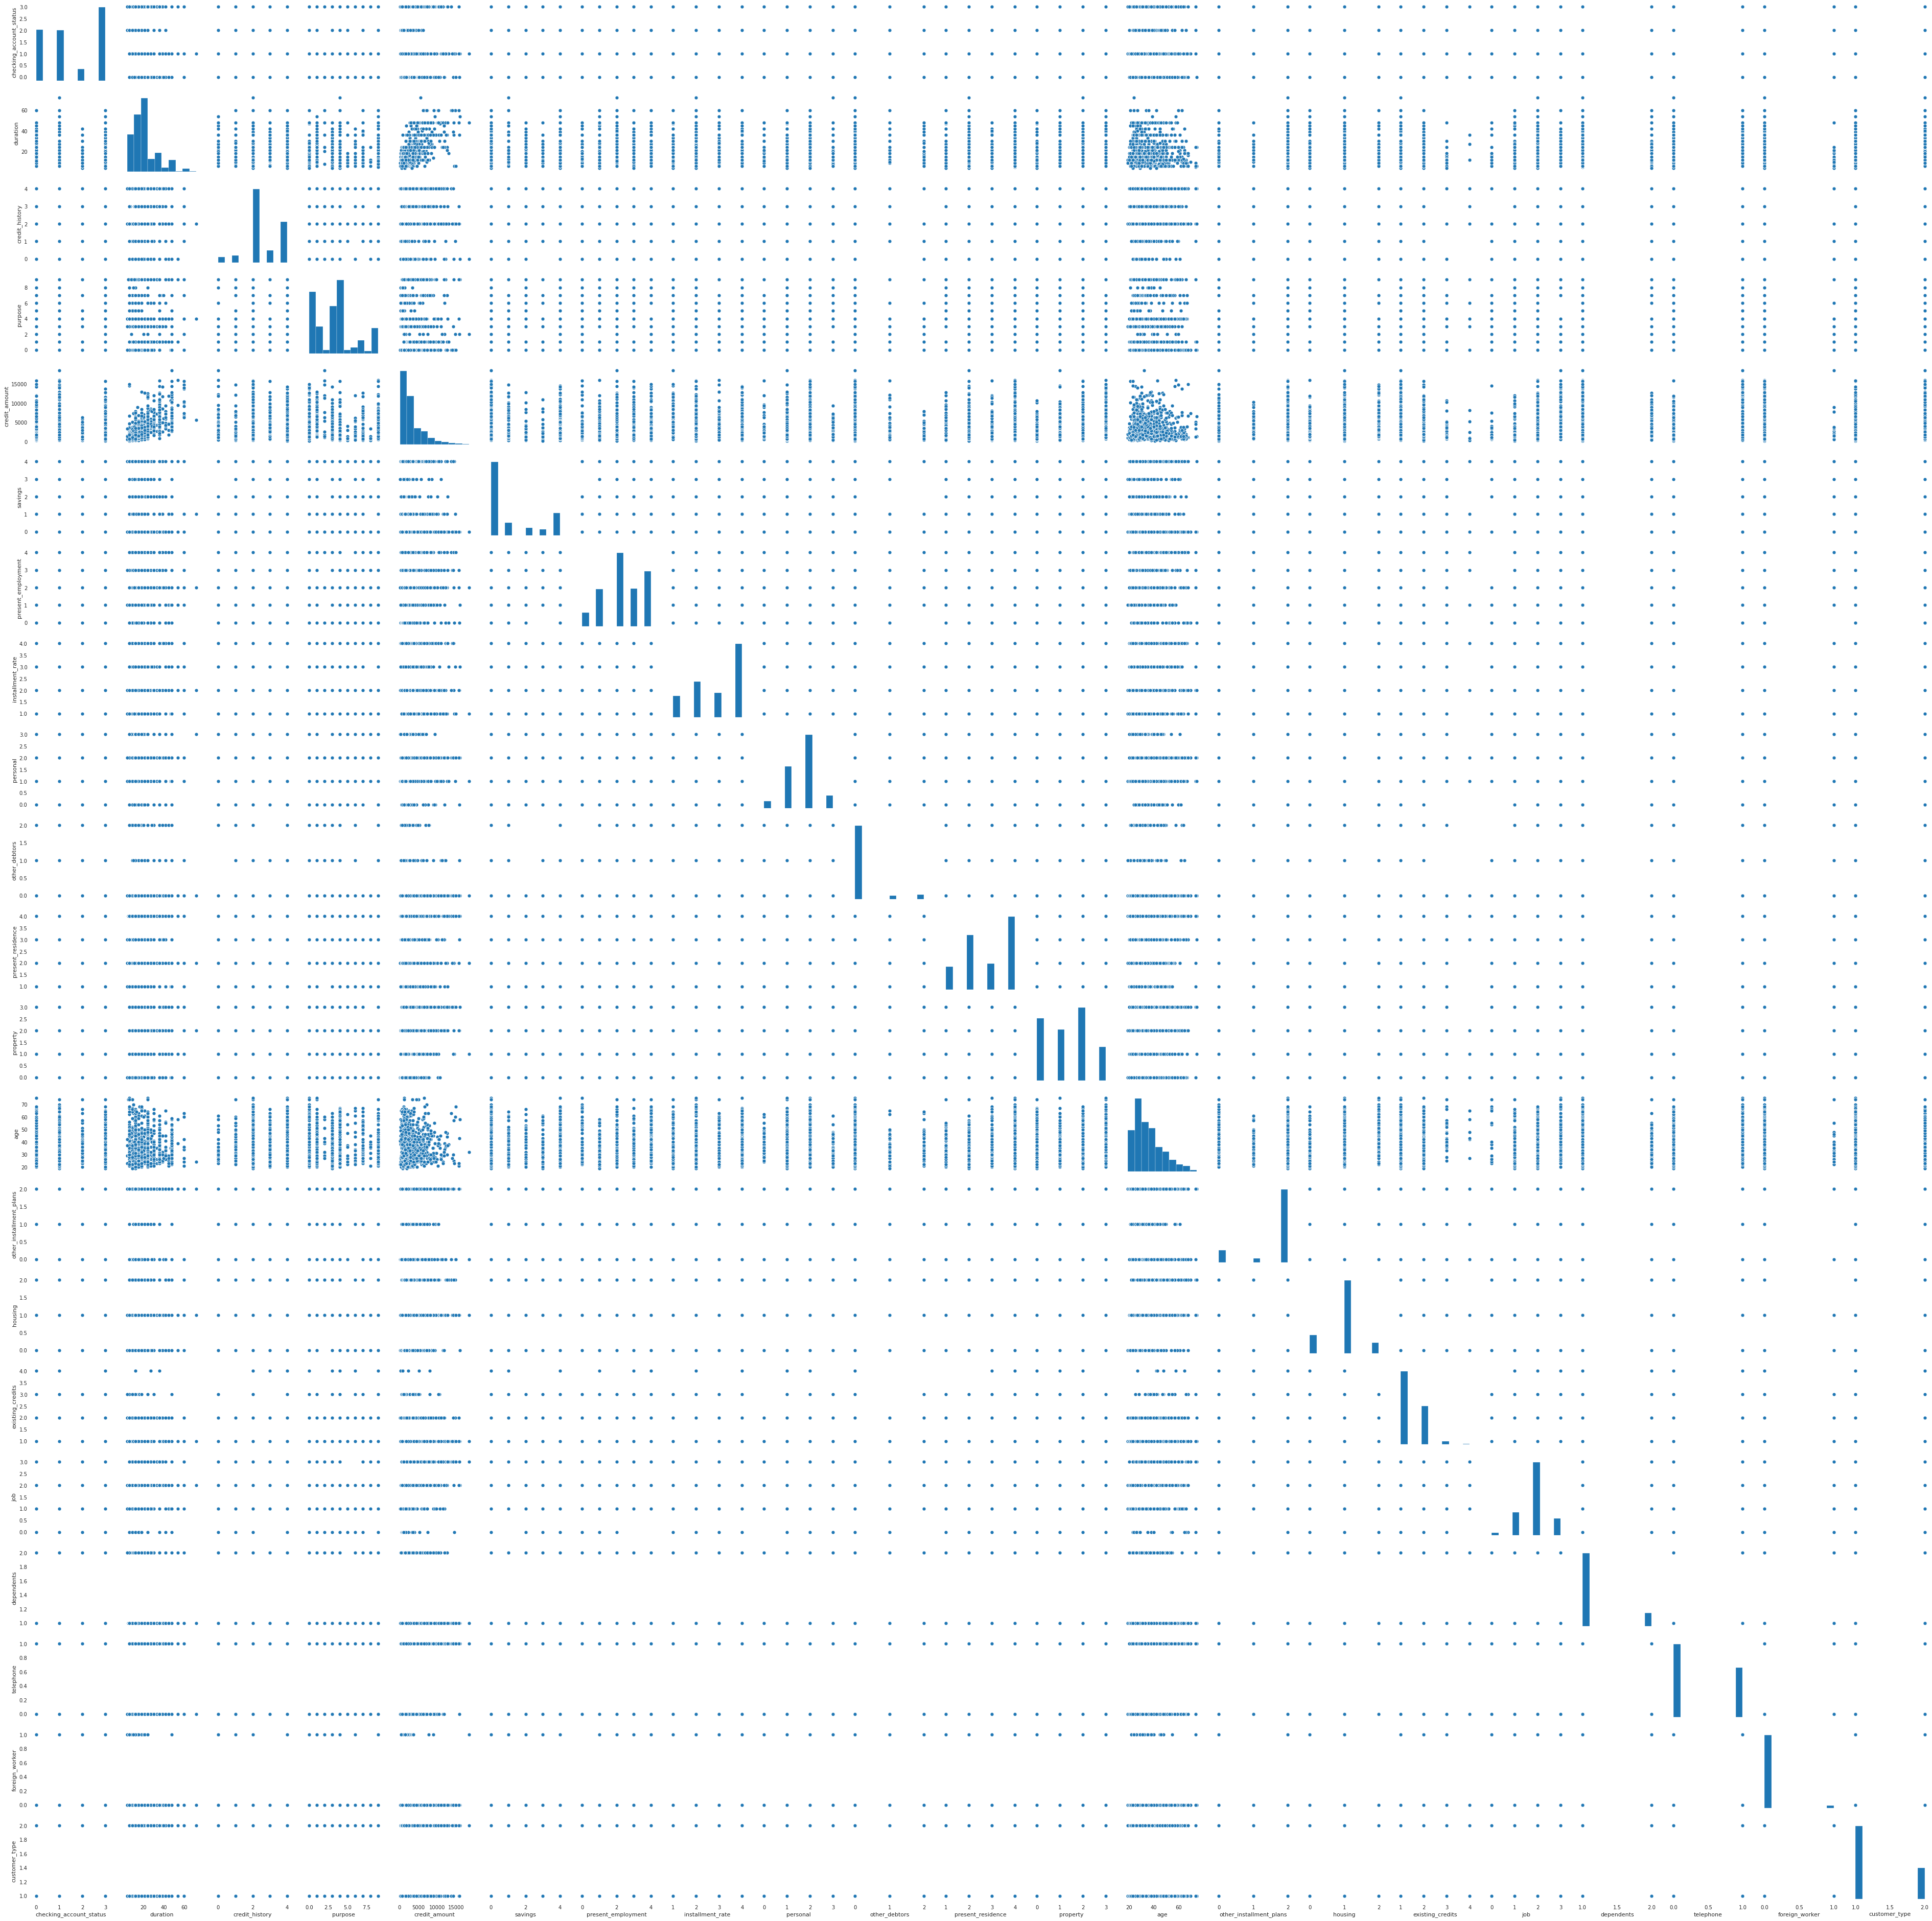

In [21]:
sns.pairplot(df)
